In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [8]:
(x_train , y_train) , (x_test , y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [9]:
len(x_train)

60000

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

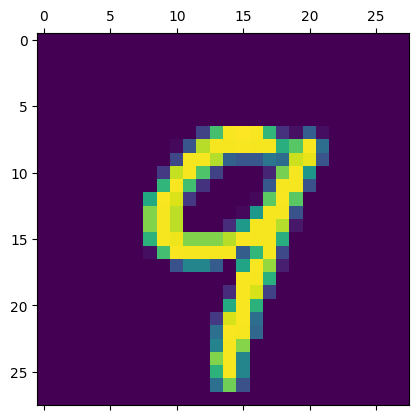

In [29]:
plt.matshow(x_test[12])

In [30]:
x_train=x_train/255
x_test=x_test/255

In [32]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)

In [33]:
x_test_flat.shape

(10000, 784)

In [34]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flat,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4631 - accuracy: 0.8790
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3033 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2830 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9248


In [37]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9258


[0.2649259865283966, 0.9258000254631042]

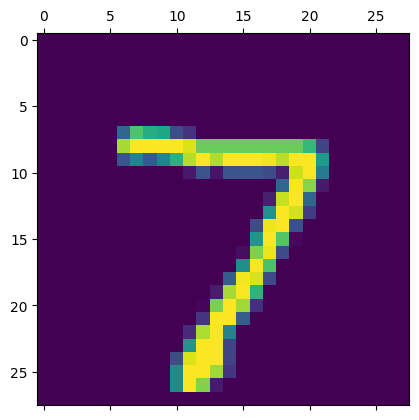

In [38]:
plt.matshow(x_test[0])

In [39]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


In [43]:
np.argmax(y_predicted[0])

7

In [45]:
np.argmax(y_predicted[12])

9

In [52]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,   10,  921,   17,    6,    3,   13,   10,   42,    5],
       [   4,    0,   17,  914,    0,   26,    2,   11,   29,    7],
       [   1,    1,    2,    1,  918,    0,   12,    4,   10,   33],
       [   9,    3,    2,   28,    8,  773,   18,    4,   40,    7],
       [  12,    3,    7,    1,    7,    9,  913,    2,    4,    0],
       [   1,    7,   22,    7,    7,    0,    0,  950,    4,   30],
       [   5,   10,    5,   16,    9,   23,    8,   11,  882,    5],
       [  10,    7,    1,    9,   31,    6,    0,   23,   12,  910]],
      dtype=int32)>